In [5]:
import itertools
import numpy as np
from sklearn.datasets import make_circles, load_iris
from mlxtend.plotting import plot_decision_regions, plot_linear_regression
import seaborn.apionly as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.rcParams['figure.figsize'] = (14, 10)
sns.set()

In [6]:
%%!
pip install mlxtend

['Requirement already satisfied: mlxtend in c:\\users\\rafael\\documents\\python\\current\\python-3.6.7.amd64\\lib\\site-packages (0.13.0)',
 'Requirement already satisfied: scipy>=0.17 in c:\\users\\rafael\\documents\\python\\current\\python-3.6.7.amd64\\lib\\site-packages (from mlxtend) (1.1.0)',
 'Requirement already satisfied: matplotlib>=1.5.1 in c:\\users\\rafael\\documents\\python\\current\\python-3.6.7.amd64\\lib\\site-packages (from mlxtend) (3.0.1)',
 'Requirement already satisfied: scikit-learn>=0.18 in c:\\users\\rafael\\documents\\python\\current\\python-3.6.7.amd64\\lib\\site-packages (from mlxtend) (0.20)',
 'Requirement already satisfied: pandas>=0.17.1 in c:\\users\\rafael\\documents\\python\\current\\python-3.6.7.amd64\\lib\\site-packages (from mlxtend) (0.23.4)',
 'Requirement already satisfied: setuptools in c:\\users\\rafael\\documents\\python\\current\\python-3.6.7.amd64\\lib\\site-packages (from mlxtend) (40.5.0)',
 'Requirement already satisfied: numpy>=1.10.4 i

In [7]:
rng = np.random.RandomState(0)
iris = load_iris()
X_circle, y_cicle = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
X_regres = 100 * rng.rand(100, 1) + 10
X_xor = rng.randn(300, 2)

In [8]:
data = {
    "regresión": {
        "X": X_regres,
        "y": 200 + 1500 * X_regres[:, 0] + rng.rand(X_regres.shape[0]) * 50000
    },
    "regresión2": {
        "X": X_regres,
        "y": 200 + X_regres[:, 0] ** 4 + rng.rand(X_regres.shape[0]) * 50000000
    },
    "iris": {
        "X": iris.data[:, [0, 2]],
        "y": iris.target
    },
    "xor": {
        "X": X_xor,
        "y": np.array(np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0), dtype=int)
    },
    "circulo": {
        "X": X_circle,
        "y": y_cicle
    }   

}

# Regresión Logistica

### Tarea: sólo clasificación

### Modelo: $$\hat{y} = \frac{1}{1 + e^{-\sum_{i=0}^p{\theta_i . x_i}}}$$

### Costo: $$\sum_{i=0}^n{y_i . \log{(\hat{y_i} + \epsilon)} + (1 - y_i) . \log{(\hat{1 - y_i + \epsilon) }}} $$

C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


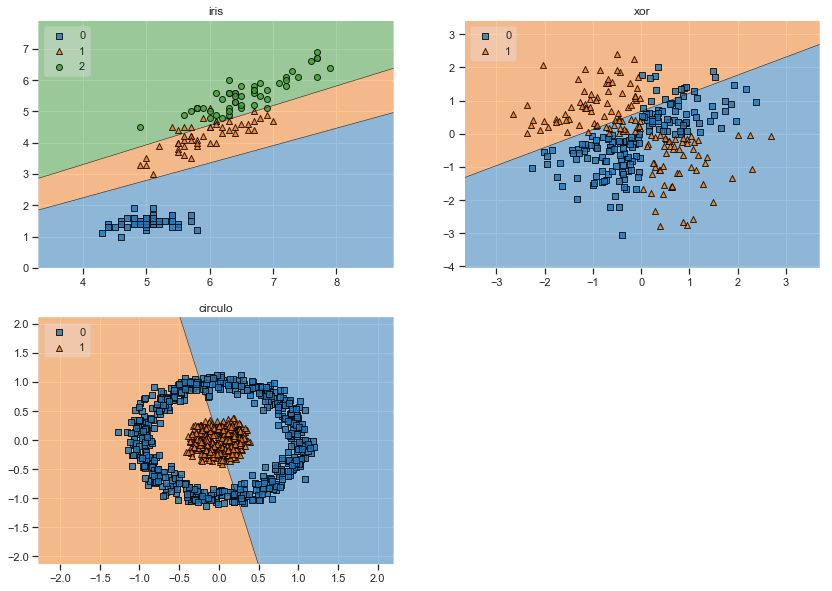

In [9]:
from sklearn.linear_model import LogisticRegression

gs = gridspec.GridSpec(2, 2)

for tipo, grd  in zip(["iris", "xor", "circulo"], itertools.product([0, 1], repeat=2)):
    clf = LogisticRegression()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    plt.title(tipo)

# KNN

### Tareas: regresión y clasificación

### Modelo: no hay, basado en memoria

### Parámetros: cantidad de vecinos / radio del vecindario


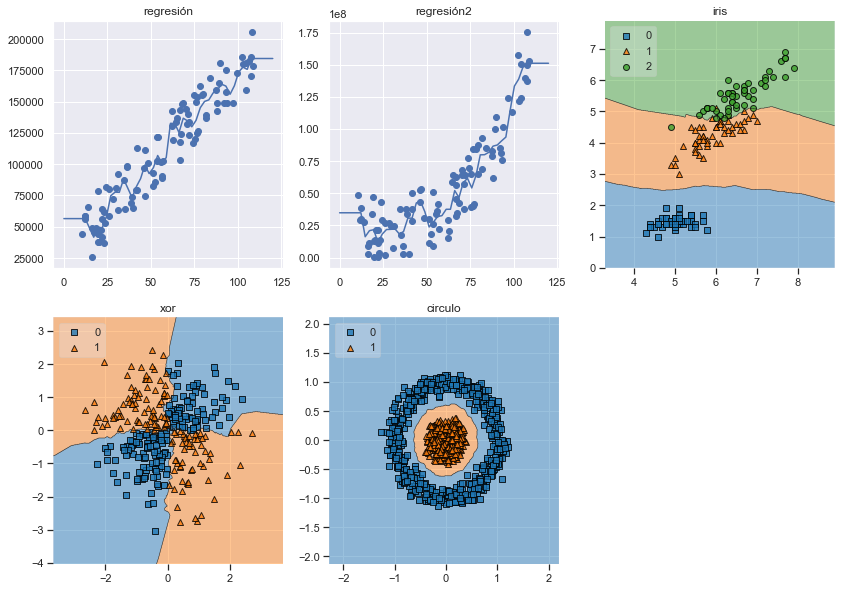

In [10]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", KNeighborsRegressor),
                                   ("regresión2", KNeighborsRegressor),
                                   ("iris", KNeighborsClassifier),
                                   ("xor", KNeighborsClassifier),
                                   ("circulo", KNeighborsClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

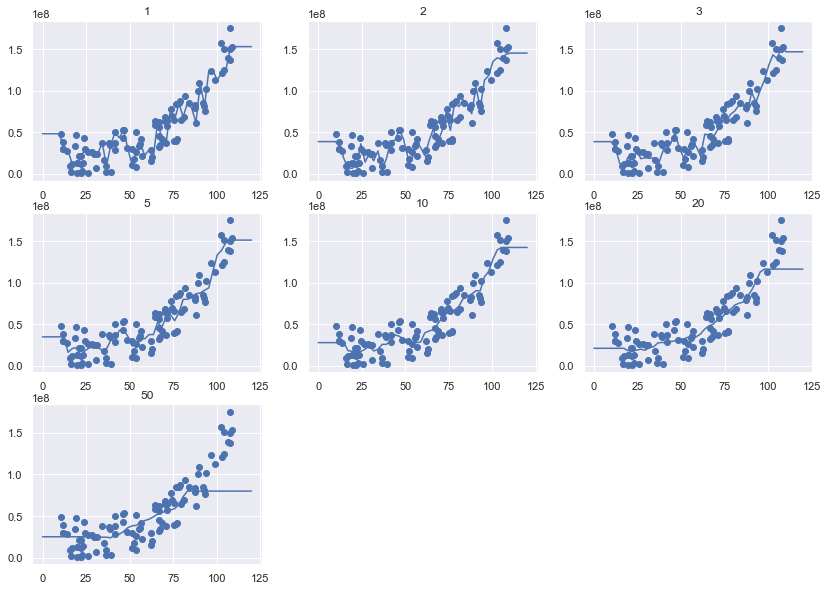

In [11]:
gs = gridspec.GridSpec(3, 3)
tipo = "regresión2"
for vecinos, grd in zip([1, 2, 3, 5, 10, 20, 50], itertools.product([0, 1, 2], repeat=2)):
    clf = KNeighborsRegressor(vecinos)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(vecinos)

# Naive Bayes

### Tarea: sólo clasficación

### Modelo: Busca encontrar la probabilidad de la variable explicada condicionada a las variables explicativas, para ello parte del teorema de bayes

## $$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}$$
                                 
### La parte "Naive" viene de asumir muy "inocentemente" que todas las variables explicativas son independientes entre si, ergo:


## $$P(x_1, \dots x_n \mid y) = \prod_{i=1}^{n} P(x_i \mid y)$$

## $$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}$$

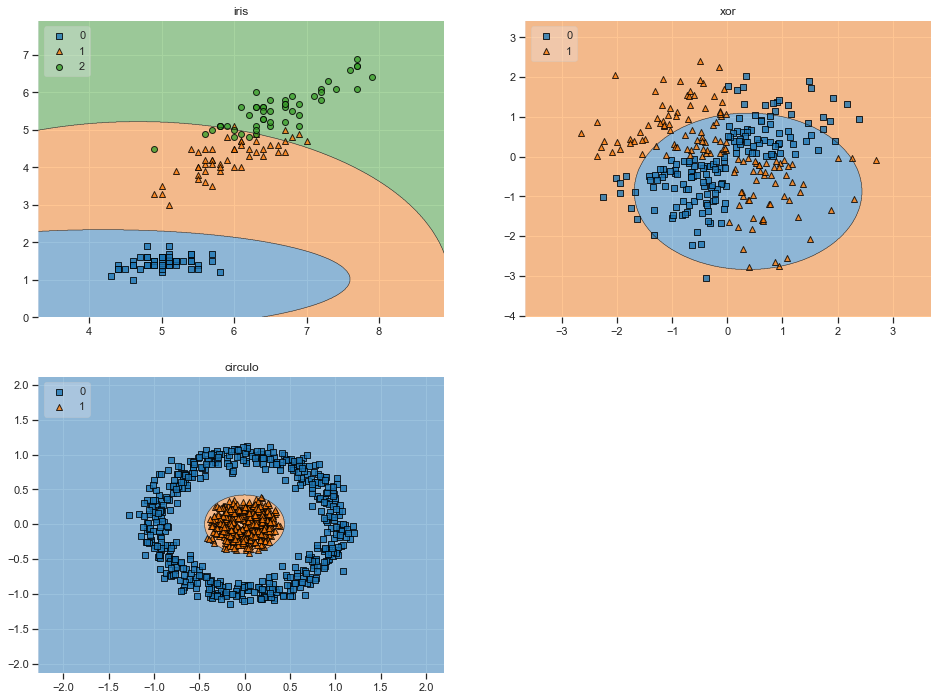

In [30]:
from sklearn.naive_bayes import GaussianNB

gs = gridspec.GridSpec(2, 2)

for tipo, grd  in zip(["iris", "xor", "circulo"], itertools.product([0, 1], repeat=2)):
    clf = GaussianNB()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    plt.title(tipo)

## Support Vector Machines

### Tareas: regresión y clasificación

### Busca maximizar los margenes entre clases, cuando no es posible una separación lineal, se puede usar el "kernel trick"

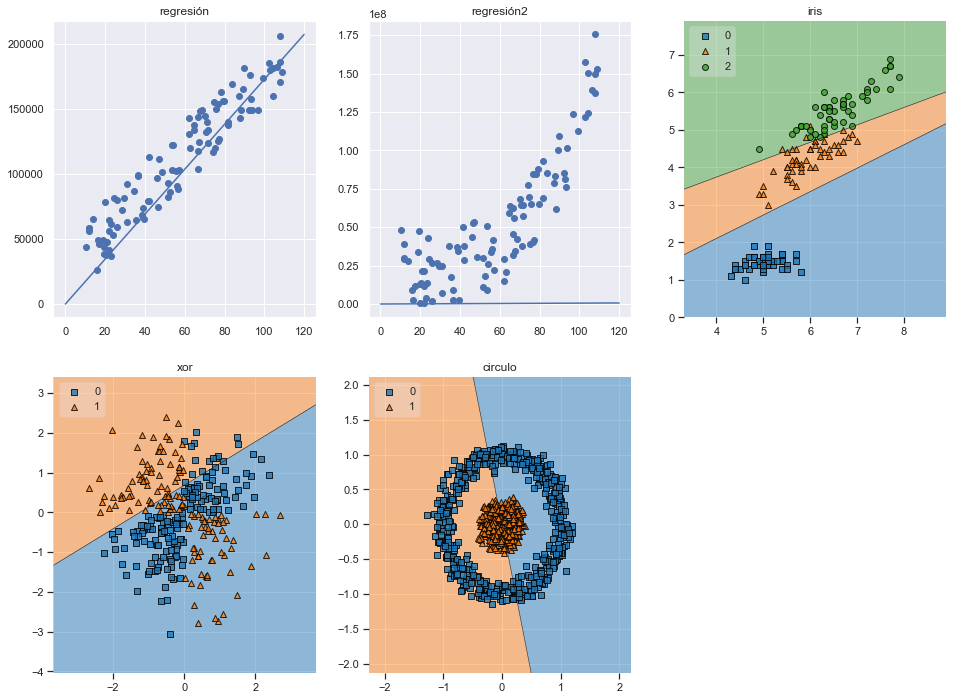

In [17]:
from sklearn.svm import LinearSVC, LinearSVR

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", +),
                                   ("regresión2", LinearSVR),
                                   ("iris", LinearSVC),
                                   ("xor", LinearSVC),
                                   ("circulo", LinearSVC)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

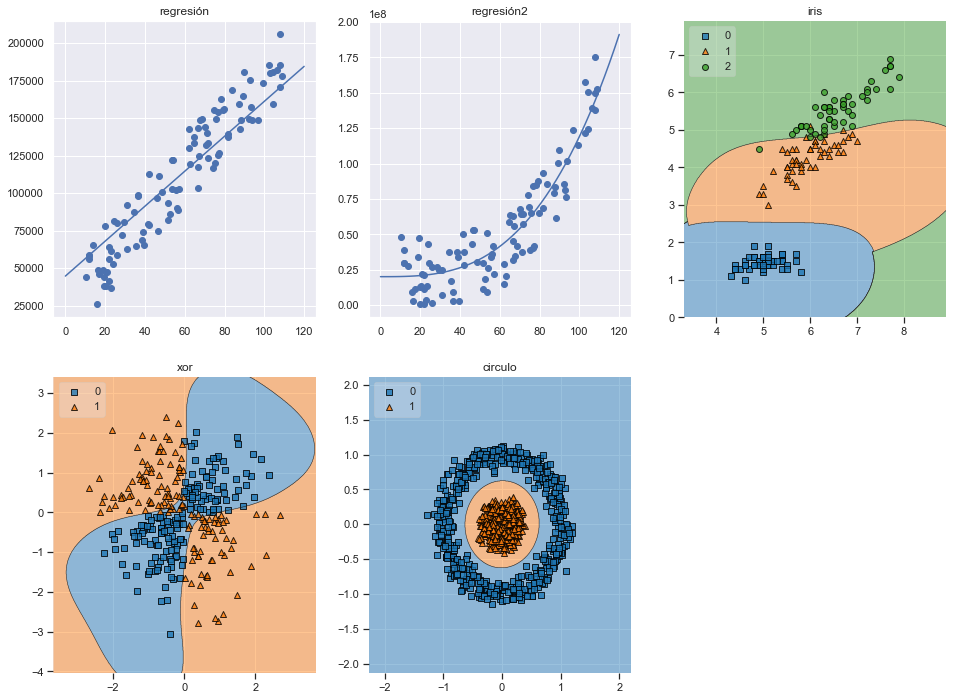

In [33]:
from sklearn.svm import SVC, SVR

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass, params), grd  in zip([("regresión", SVR, {"kernel": "linear"}),
                                   ("regresión2", SVR, {"kernel": "poly"}),
                                   ("iris", SVC, {}),
                                   ("xor", SVC, {}),
                                   ("circulo", SVC, {})], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass(**params)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

In [40]:
SVC?

C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

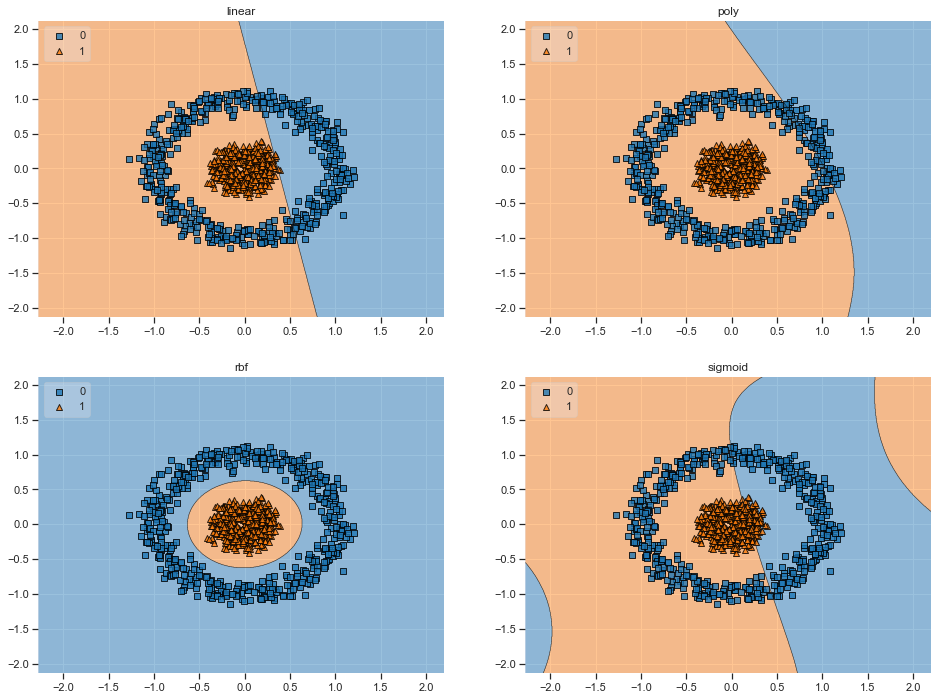

In [39]:
gs = gridspec.GridSpec(2, 2)
tipo = "circulo"
for kernel, grd  in zip(['linear', 'poly', 'rbf', 'sigmoid'], itertools.product([0, 1], repeat=2)):
    clf = SVC(kernel=kernel)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(kernel)

# Árboles de decision

### Tareas: regresión y clasificación

### Son metodos de inducción no paramétricos (no hay modelo tipo ecuación). Se basan en la creación "greedy" de simples reglas de decisión que permitan modelar el problema.

![alt text](arbol.png "Title")

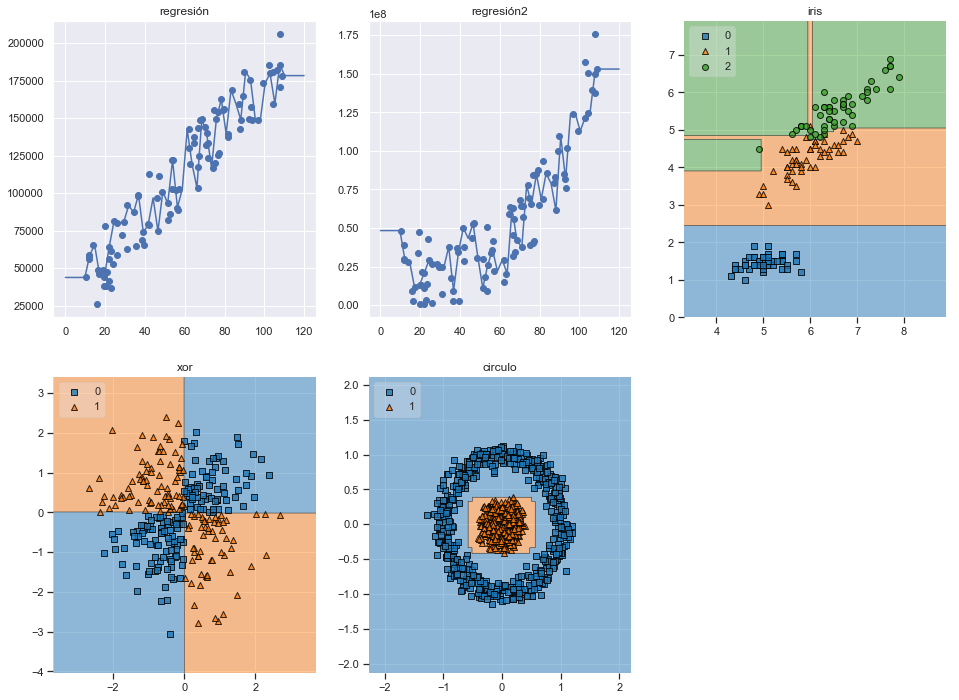

In [41]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", DecisionTreeRegressor),
                                   ("regresión2", DecisionTreeRegressor),
                                   ("iris", DecisionTreeClassifier),
                                   ("xor", DecisionTreeClassifier),
                                   ("circulo", DecisionTreeClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

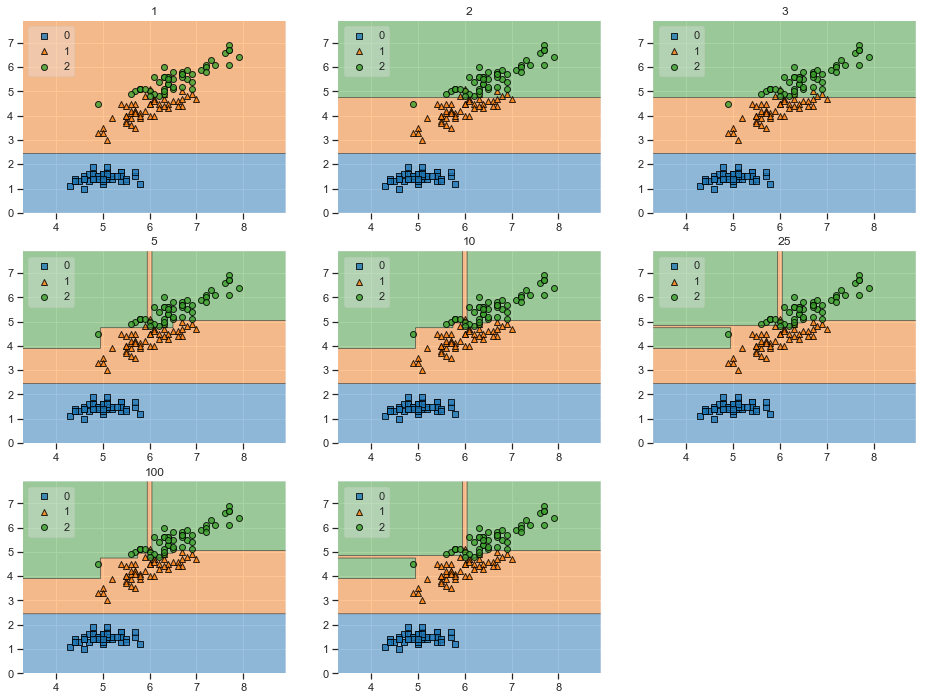

In [44]:
gs = gridspec.GridSpec(3, 3)
tipo = "iris"
for depth, grd  in zip([1, 2, 3, 5, 10, 25, 100, None], itertools.product([0, 1, 2], repeat=2)):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(depth)

# Ensamble 1: Random Forest

### Tareas: regresión y clasificación

### Consiste en promediar una serie de algortimos base (arboles, sino se llama bagging), entreganos en un sub-set de casos y variables. Busca disminuir la varianza de la estimación

![alt text](forest.png "Title")

C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

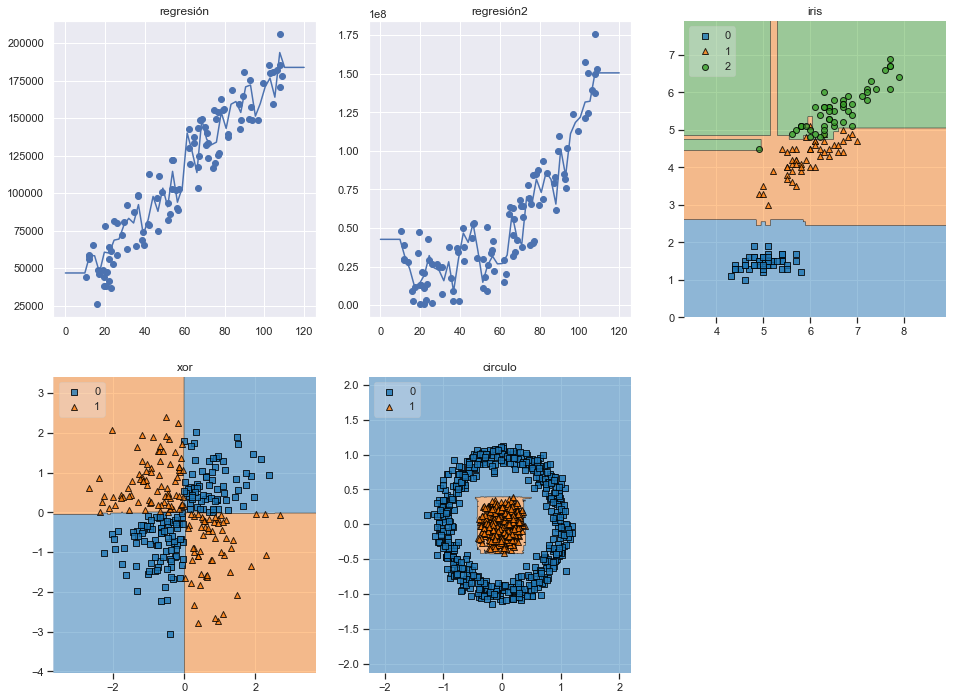

In [45]:
from sklearn.ensemble  import RandomForestClassifier, RandomForestRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", RandomForestRegressor),
                                   ("regresión2", RandomForestRegressor),
                                   ("iris", RandomForestClassifier),
                                   ("xor", RandomForestClassifier),
                                   ("circulo", RandomForestClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rafael\Documents\python\current\python-3.6.7.amd64\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

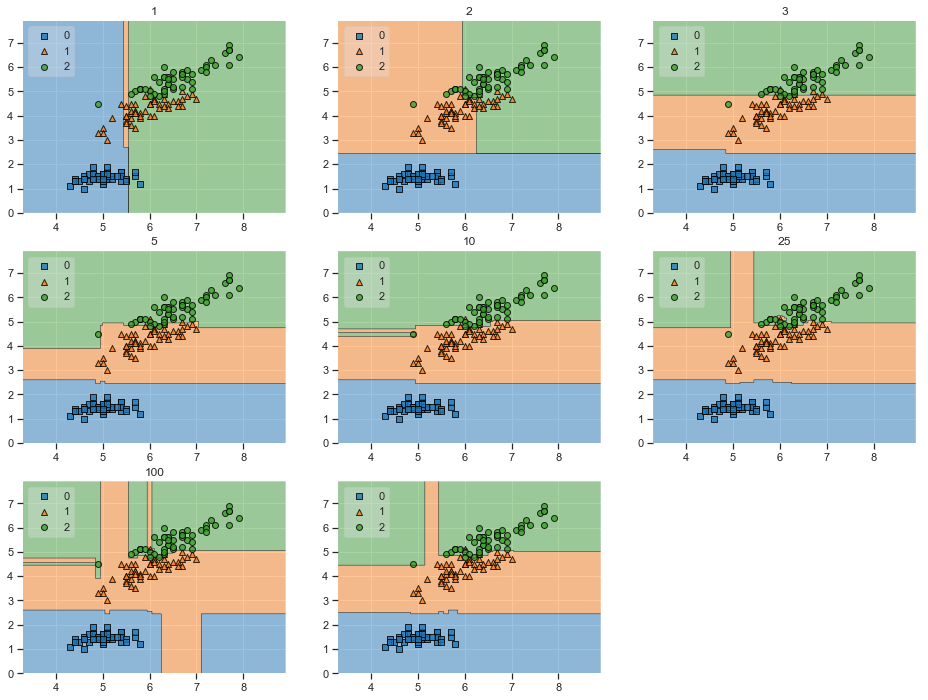

In [46]:
gs = gridspec.GridSpec(3, 3)
tipo = "iris"
for depth, grd  in zip([1, 2, 3, 5, 10, 25, 100, None], itertools.product([0, 1, 2], repeat=2)):
    clf = RandomForestClassifier(max_depth=depth)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(depth)

# Ensamble 1: Boosting (Adaboosting & GraientBoosting)

### Tareas: regresión y clasificación

### Son metodos que también agregan clasificadores base, pero en lugar de promediarlos, van ajustando los pesos de los posteriores, basados en los erroes de los anteriores

![alt text](adaboost.jpeg "Title")

C:\Users\rcrescenzi\Documents\utils\python\current\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rcrescenzi\Documents\utils\python\current\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\rcrescenzi\Documents\utils\python\current\python-3.6.6.amd64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


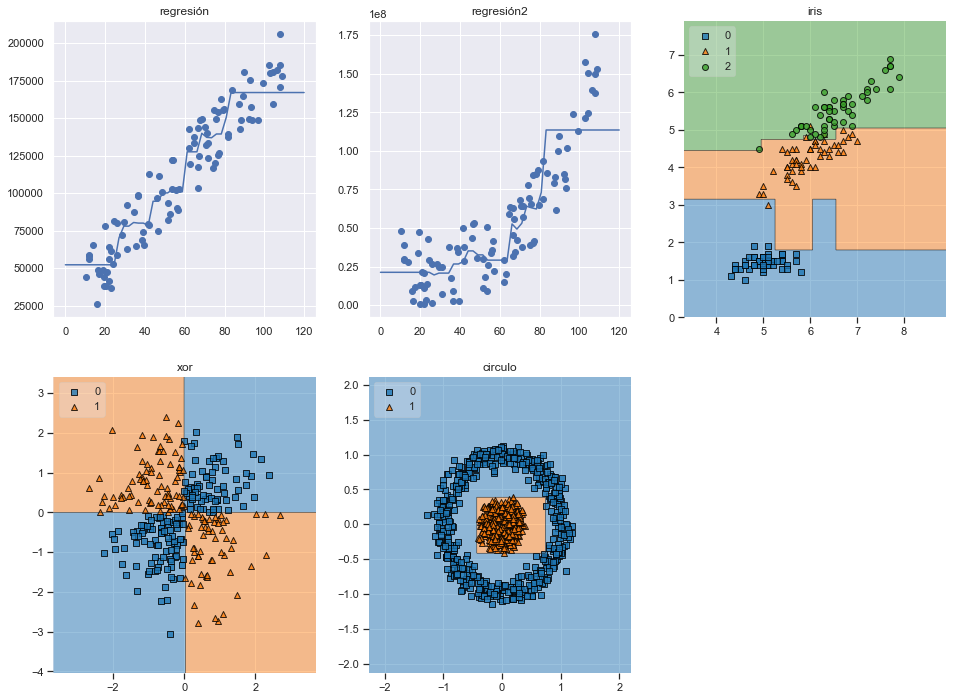

In [21]:
from lightgbm import LGBMClassifier, LGBMRegressor

gs = gridspec.GridSpec(2, 3)

for (tipo, clfClass), grd  in zip([("regresión", LGBMRegressor),
                                   ("regresión2", LGBMRegressor),
                                   ("iris", LGBMClassifier),
                                   ("xor", LGBMClassifier),
                                   ("circulo", LGBMClassifier)], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass()
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

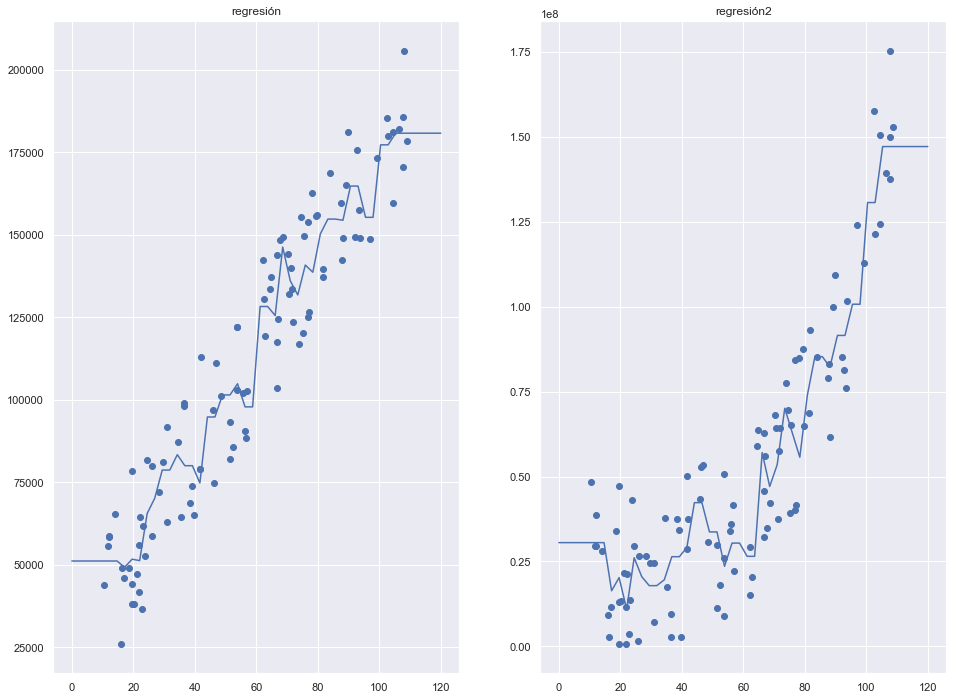

In [24]:
from lightgbm import LGBMClassifier, LGBMRegressor

gs = gridspec.GridSpec(1, 2)

for (tipo, clfClass), grd  in zip([("regresión", LGBMRegressor),
                                   ("regresión2", LGBMRegressor)
                                   ], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass(min_child_samples=5)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)

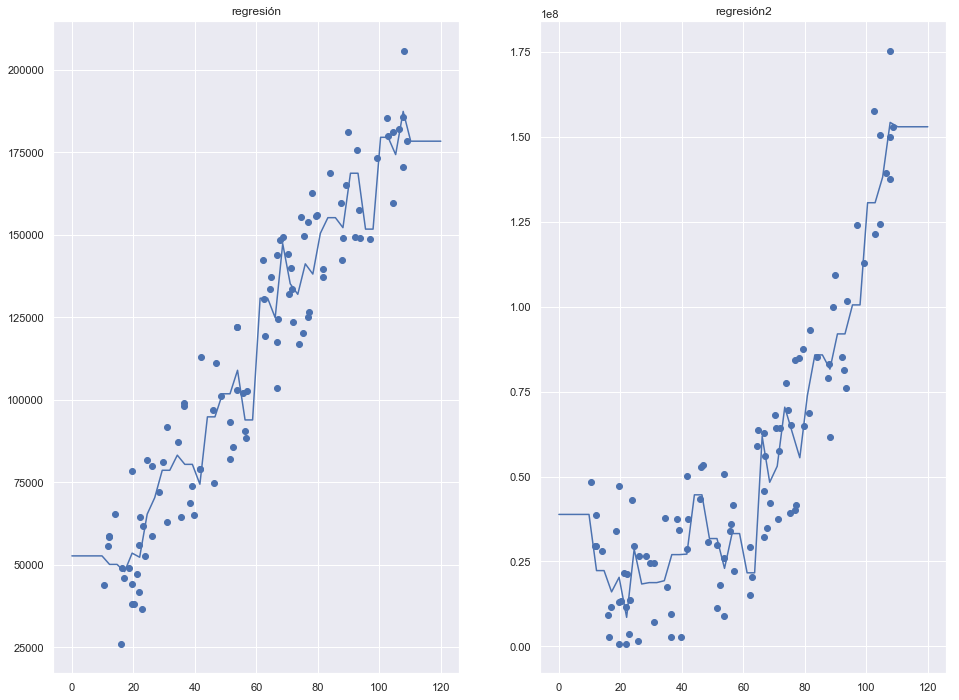

In [25]:
from lightgbm import LGBMClassifier, LGBMRegressor

gs = gridspec.GridSpec(1, 2)

for (tipo, clfClass), grd  in zip([("regresión", LGBMRegressor),
                                   ("regresión2", LGBMRegressor)
                                   ], itertools.product([0, 1, 2], repeat=2)):
    clf = clfClass(min_child_samples=1)
    clf.fit(data[tipo]["X"], data[tipo]["y"])
    ax = plt.subplot(gs[grd[0], grd[1]])
    try:
        fig = plot_decision_regions(X=data[tipo]["X"], y=data[tipo]["y"], clf=clf, legend=2)
    except:
        plt.scatter(data[tipo]["X"], data[tipo]["y"])
        plt.plot(np.linspace(0, 120), clf.predict(np.linspace(0, 120)[:, None]))
    plt.title(tipo)